In [4]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
hotels = pd.read_excel('data/HotelCustomersDataset.xlsx')

In [14]:
hotels['date'] = (pd.to_datetime('2018-12-31') - pd.to_timedelta(hotels['DaysSinceCreation'], unit = 'D')).astype('datetime64[ns]')

# Assignment 1

In [17]:
daily_revenue = (hotels
                 .groupby('date')
                 .agg(
                    LodgingRevenue = pd.NamedAgg('LodgingRevenue', 'sum'),
                    OtherRevenue = pd.NamedAgg('OtherRevenue', 'sum')
                 )
                 )
monthly_revenue = daily_revenue.resample('M').sum()

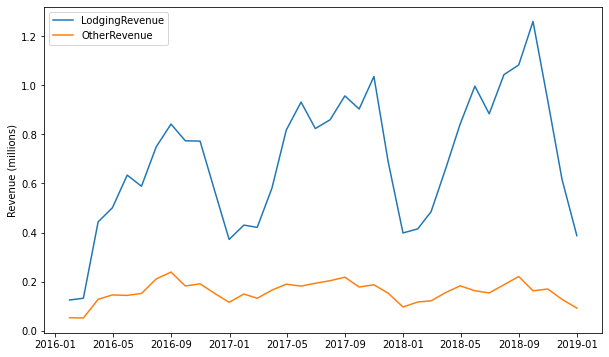

In [21]:
fig, ax = plt.subplots(figsize = (10 ,6))

ax.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue'] / 1_000_000)
ax.plot(monthly_revenue.index, monthly_revenue['OtherRevenue'] / 1_000_000)

ax.set_ylabel('Revenue (millions)')


ax.legend(monthly_revenue.columns)

plt.show()

In [12]:
hotels.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')